# Search

## DFS- Depth-First Search [ LIFO ]

1
3
7
6
2
5
9
4
8


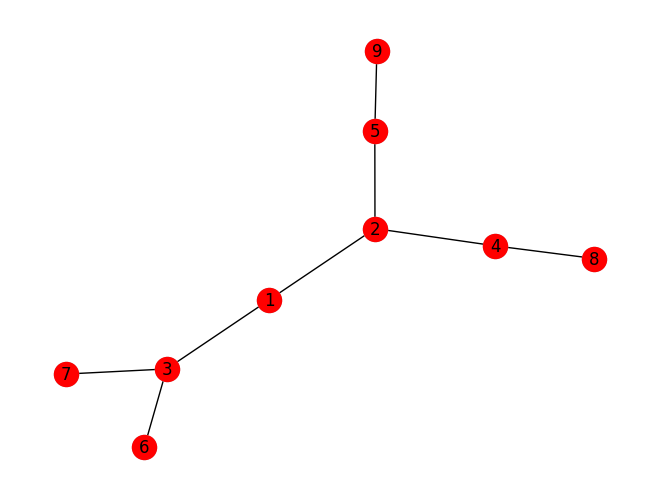

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs(graph, start_node):
    visited = set()
    stack = [start_node]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            print(node)  # Print the visited node (you can modify or remove this line)

            neighbors = graph[node]
            stack.extend(neighbors)

    return visited

# Example graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (5, 9)])

# Perform DFS starting from node 1
visited_nodes = dfs(G, 1)

# Visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue')
nx.draw_networkx_nodes(G, pos, nodelist=visited_nodes, node_color='red')
plt.show()


## BFS - Breadth First Search [FIFO]

1
2
3
4
5
6
7
8
9


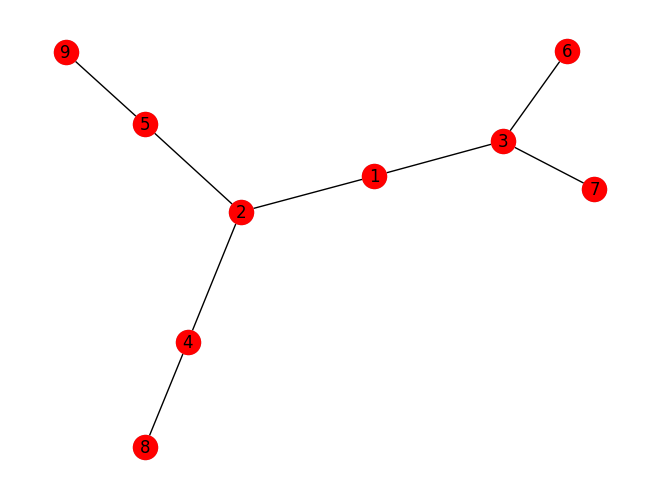

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs(graph, start_node):
    visited = set()
    queue = deque([start_node])

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            print(node)  # Print the visited node (you can modify or remove this line)

            neighbors = graph[node]
            queue.extend(neighbors)

    return visited

# Example graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (5, 9)])

# Perform BFS starting from node 1
visited_nodes = bfs(G, 1)

# Visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue')
nx.draw_networkx_nodes(G, pos, nodelist=visited_nodes, node_color='red')
plt.show()


## Both DFS & BFS

BFS Sequence:  A -> B -> C -> A -> D -> E -> F
DFS Sequence:  A -> B -> D -> E -> F -> C


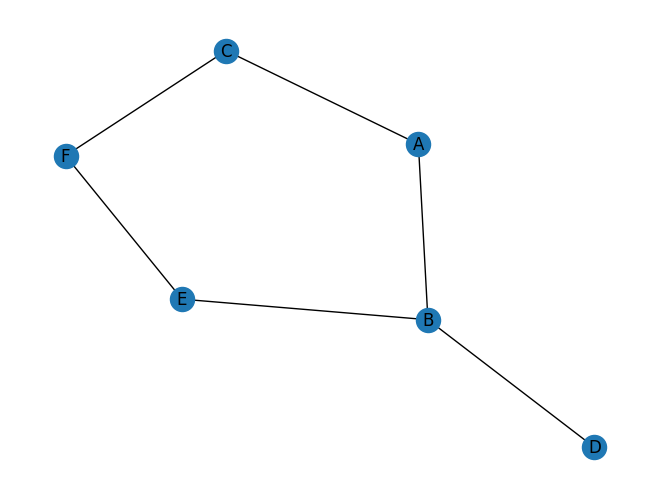

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Graph definition
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E'],
}

# BFS function
def bfs(graph, root):
    visited = set()
    queue = deque([root])
    sequence = []

    while queue:
        vertex = queue.popleft()
        sequence.append(vertex)

        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
    
    print("BFS Sequence: ", ' -> '.join(sequence))

# DFS function
def dfs(graph, root, visited=None, sequence=None):
    if visited is None:
        visited = set()
    if sequence is None:
        sequence = []

    visited.add(root)
    sequence.append(root)

    for neighbour in graph[root]:
        if neighbour not in visited:
            dfs(graph, neighbour, visited, sequence)

    return sequence

# Run BFS from node A
bfs(graph, 'A')

# Run DFS from node A
dfs_sequence = dfs(graph, 'A')
print("DFS Sequence: ", ' -> '.join(dfs_sequence))

# Create a new graph for visualization
G = nx.Graph()

# Add edges to the graph (NetworkX automatically adds nodes)
for node, neighbours in graph.items():
    for neighbour in neighbours:
        G.add_edge(node, neighbour)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


## + Sequence

BFS Sequence:  A -> B -> C -> A -> D -> E -> F
DFS Sequence:  A -> B -> D -> E -> F -> C


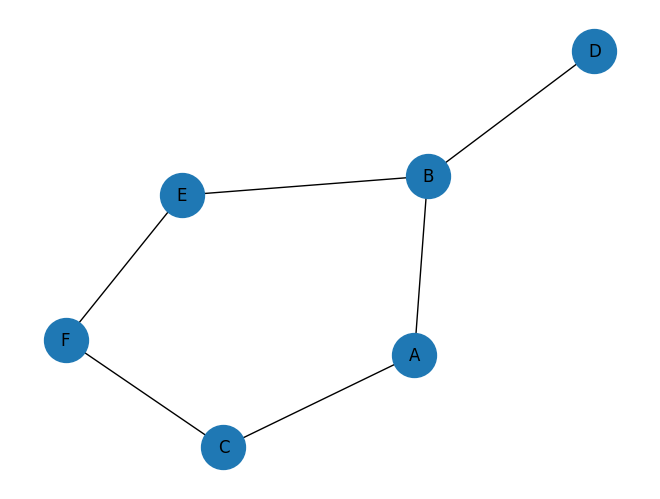

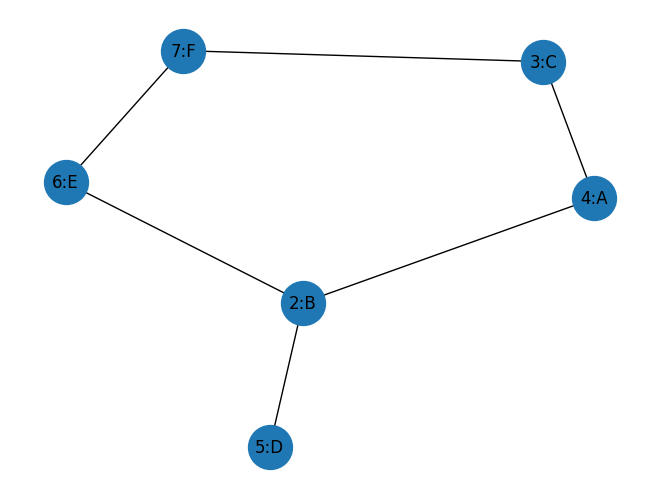

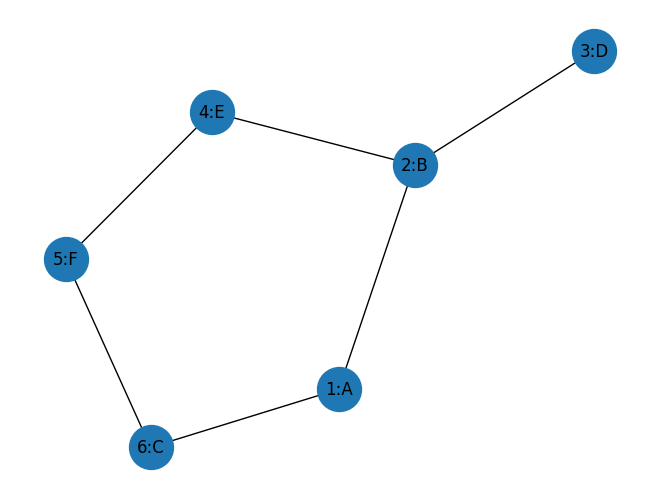

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Graph definition
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E'],
}

# BFS function
def bfs(graph, root):
    visited = set()
    queue = deque([root])
    sequence = []

    while queue:
        vertex = queue.popleft()
        sequence.append(vertex)

        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
    
    return sequence

# DFS function
def dfs(graph, root, visited=None, sequence=None):
    if visited is None:
        visited = set()
    if sequence is None:
        sequence = []

    visited.add(root)
    sequence.append(root)

    for neighbour in graph[root]:
        if neighbour not in visited:
            dfs(graph, neighbour, visited, sequence)

    return sequence

# Run BFS from node A
bfs_sequence = bfs(graph, 'A')
print("BFS Sequence: ", ' -> '.join(bfs_sequence))

# Run DFS from node A
dfs_sequence = dfs(graph, 'A')
print("DFS Sequence: ", ' -> '.join(dfs_sequence))

# Create a new graph for visualization
G = nx.Graph()

# Add edges to the graph (NetworkX automatically adds nodes)
for node, neighbours in graph.items():
    for neighbour in neighbours:
        G.add_edge(node, neighbour)

# Draw the original graph
nx.draw(G, with_labels=True, node_size=1000)
plt.show()

# Draw BFS sequence graph
G_bfs = nx.relabel_nodes(G, {node: f'{i}:{node}' for i, node in enumerate(bfs_sequence, start=1)})
nx.draw(G_bfs, with_labels=True, node_size=1000)
plt.show()

# Draw DFS sequence graph
G_dfs = nx.relabel_nodes(G, {node: f'{i}:{node}' for i, node in enumerate(dfs_sequence, start=1)})
nx.draw(G_dfs, with_labels=True, node_size=1000)
plt.show()


## Using a Tree-Like structure - No Visualization

In [33]:
from binarytree import build
from collections import deque

# Generate a binary tree
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
binary_tree = build(nodes)

# Print the binary tree
print(binary_tree)

# BFS function for binarytree Node
def bfs(root):
    queue = deque([root])
    sequence = []

    while queue:
        node = queue.popleft()
        sequence.append(node.value)

        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return sequence

# DFS function for binarytree Node
def dfs(node, sequence=None):
    if sequence is None:
        sequence = []

    if node:
        sequence.append(node.value)
        dfs(node.left, sequence)
        dfs(node.right, sequence)

    return sequence

# Run BFS and DFS from root
bfs_sequence = bfs(binary_tree)
dfs_sequence = dfs(binary_tree)

# Print BFS and DFS sequences
print("BFS Sequence: ", bfs_sequence)
print("DFS Sequence: ", dfs_sequence)



    __A__
   /     \
  B       C
 / \     / \
D   E   F   G

BFS Sequence:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']
DFS Sequence:  ['A', 'B', 'D', 'E', 'C', 'F', 'G']


## With Visualization


    __A__
   /     \
  B       C
 / \     / \
D   E   F   G



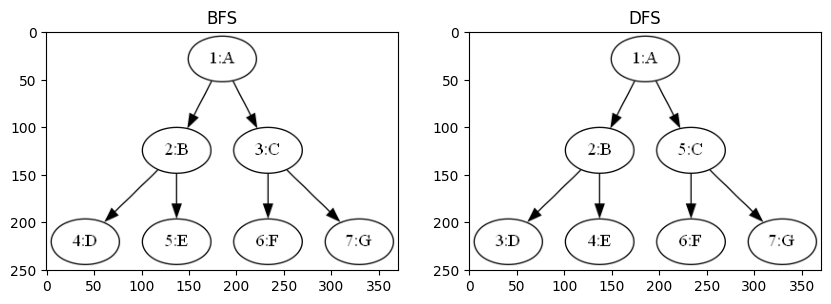

In [39]:
from binarytree import build
from collections import deque
from graphviz import Digraph

# Generate a binary tree
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
binary_tree = build(nodes)

# Print the binary tree
print(binary_tree)

# BFS function for binarytree Node
def bfs(root):
    queue = deque([root])
    sequence = []

    while queue:
        node = queue.popleft()
        sequence.append(node.value)

        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return sequence

# DFS function for binarytree Node
def dfs(node, sequence=None):
    if sequence is None:
        sequence = []

    if node:
        sequence.append(node.value)
        dfs(node.left, sequence)
        dfs(node.right, sequence)

    return sequence

# Run BFS and DFS from root
bfs_sequence = bfs(binary_tree)
dfs_sequence = dfs(binary_tree)

# Function to add edges to the graph and label nodes with sequence numbers
def add_edges(node, sequence, dot):
    if node:
        dot.node(str(node.value), f'{sequence.index(node.value) + 1}:{node.value}')
        if node.left:
            dot.edge(str(node.value), str(node.left.value))
            add_edges(node.left, sequence, dot)
        if node.right:
            dot.edge(str(node.value), str(node.right.value))
            add_edges(node.right, sequence, dot)

# Initialize graph for BFS
dot_bfs = Digraph('BFS', format='png')

# Add edges to the BFS graph
add_edges(binary_tree, bfs_sequence, dot_bfs)

# Save BFS graph as PNG
dot_bfs.render('test-output/bfs')

# Initialize graph for DFS
dot_dfs = Digraph('DFS', format='png')

# Add edges to the DFS graph
add_edges(binary_tree, dfs_sequence, dot_dfs)

# Save DFS graph as PNG
dot_dfs.render('test-output/dfs')

# Load the images
bfs_img = plt.imread('test-output/bfs.png')
dfs_img = plt.imread('test-output/dfs.png')

# Create a new figure
plt.figure(figsize=(10, 10))

# Add a subplot for BFS
plt.subplot(1, 2, 1)
plt.title('BFS')
plt.imshow(bfs_img)

# Add a subplot for DFS
plt.subplot(1, 2, 2)
plt.title('DFS')
plt.imshow(dfs_img)

# Display the figure
plt.show()
